Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2025
<br>

<h1><center>Tarea 2: Isolation Forest, HAC, DBSCAN y HDBSCAN </center></h1>
        Profesor: Marcelo Mendoza<br>
        Ayudantes encargados: Itzae Flores, Claudia González y Eduardo Salinas.<br>
        Fecha de entrega: 23 de abril del 2025.

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
- El notebook debe tener todas las celdas de código ejecutadas.
- Para las preguntas de desarrollo se espera un análisis profundo, no una respuesta superficial.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [155]:
##Importa acá las librerias que vayas a utilizar
## De ser necesario, utiliza el comando !pip install a aquellas librerias o modulos que no se encuentren instalados, como puede ser HDBSCAN.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from random import random
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, minmax_scale
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN, cluster_optics_dbscan
from sklearn.ensemble import IsolationForest
# from sklearn.cluster import , HDBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

El siguiente codigo sirve para importar HDBSCAN en el caso de que les arroje error importar desde sklearn.

In [156]:
from hdbscan import HDBSCAN

# Introducción

El conjunto de datos corresponde a características extraidas de imagenes de distintos clientes que están buscando pedir un crédito a un banco. Se trabaja con este dataset para predecir si el cliente aceptó o no el último préstamo ofrecido (dado por la columna "Personal Loan") por medio del uso de HAC, DBSCAN, HDBSCAN e Isolation Forest.

En esta tarea deberás trabajar con el dataset Imbalanced Personal Bank Loan Classification que puedes descargar de [Kaggle] (https://www.kaggle.com/code/farzadnekouei/imbalanced-personal-bank-loan-classification) o Canvas.

# Parte 1: Carga y Preprocesamiento de Datos (10 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de datos (1 puntos)

In [157]:
# Cargamos los datos
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 1.2 Descripcion del Dataset (5 puntos)

El dataframe posee datos relacionados a clientes de un banco, en el cual se busca predecir si el cliente aceptó o no el último préstamo ofrecido. Dentro del dataset se pueden encontrar datos de tipo númerico, siendo la mayoría de estos de tipo entero, por lo que es correspondiente una normalización debido a que la diferencia de escala entre las variables puede afectar el rendimiento de los algoritmos de machine learning.

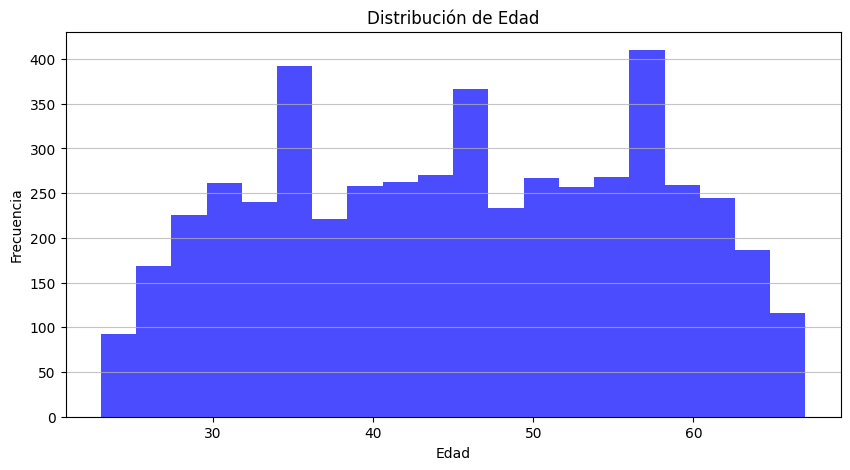

Edad máxima: 67
Edad mínima: 23


In [158]:
# Graficamos la distribución de edad de los datos
plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()
print('Edad máxima:', df['Age'].max())
print('Edad mínima:', df['Age'].min())

Con respecto a la edad de los datos, se puede observar que existe una gran variabilidad en la edad de los clientes, siendo la edad mínima de 23 años y la máxima de 67 años, existiendo una cierta tendencia a que la mayoría de los clientes se encuentran entre los 30 y 60 años. Por otro lado, tomando un punto de vista mucho más general, el observar una gran variabiliadad en las edades permitirá que el modelo pueda aprender una mayor cantidad de patrones de comportamiento, lo que podría llevar a un mejor rendimiento del modelo.

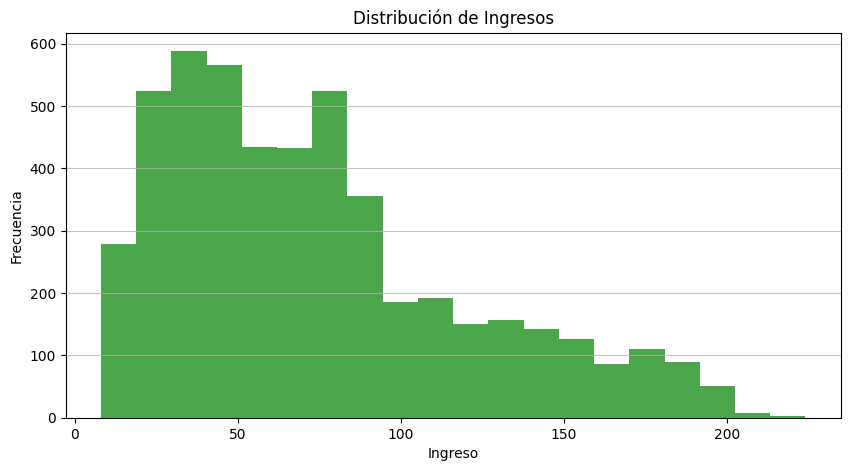

Ingreso máximo: 224
Ingreso mínimo: 8
Ingreso promedio: 73.7742


In [159]:
# Analizamos la distribución de la variable 'Income'
plt.figure(figsize=(10, 5))
plt.hist(df['Income'], bins=20, color='green', alpha=0.7)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()
print('Ingreso máximo:', df['Income'].max())
print('Ingreso mínimo:', df['Income'].min())
print('Ingreso promedio:', df['Income'].mean())

Respecto a la distribución de salarios dentro del dataset, se puede observar que en promedio los clientes poseen un salario de 73.77 mil, siendo el salario mínimo de 8 mil y el máximo de 224 mil. En este caso, a diferencia de la distribución de edad, se puede observar que la mayoría de los clientes poseen un salario menor a los 100 mil, lo que podría conllevar a un sesgo en el modelo, siendo clave nuevamente la normalización de los datos para evitar que el modelo se vea afectado por la diferencia de escalas entre las variables.

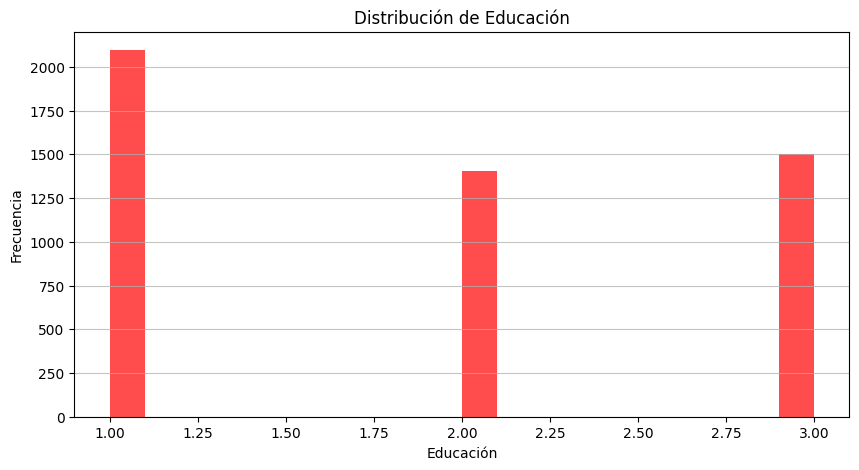

In [160]:
# Graficamos la distribución de la variable 'Education'
plt.figure(figsize=(10, 5))
plt.hist(df['Education'], bins=20, color='red', alpha=0.7)
plt.title('Distribución de Educación')
plt.xlabel('Educación')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Respecto a la distribución de la variable de `education`, se puede observar que la mayoría de los clientes poseen un nivel de educación de `Bachelor`, mientras que el nivel de educación menos común es el de `PhD`. Esto podría ser un factor importante a la hora de predecir si el cliente aceptó o no el último préstamo ofrecido, ya que podría haber una correlación entre el nivel de educación y el ingreso anual del cliente, lo que influiría de aceptar un préstamo o no.

#### 1.2.1 Describa brevemente cuantas columnas tiene el dataset y en que consisten las columna del dataset entregado (1 puntos)

In [161]:
df.shape

(5000, 14)

**Respuesta:** El dataset posee un total de 14 columnas, las cuales son:
- **ID**: ID del cliente.
- **Age**: Edad del cliente.
- **Experience**: Años de experiencia laboral del cliente.
- **Income**: Ingreso anual del cliente.
- **ZIP Code**: Código postal del cliente.
- **Family**: Número de miembros en la familia del cliente.
- **CCAvg**: Promedio de gasto mensual en tarjetas de crédito del cliente.
- **Education**: Nivel educativo del cliente (1: Bachelor, 2: Master, 3: PhD).
- **Mortgage**: Monto de la hipoteca del cliente.
- **Personal Loan**: Indica si el cliente aceptó o no el último préstamo ofrecido por el banco (1: sí, 0: no).
- **Securities Account**: Indica si el cliente tiene una cuenta de valores (1: sí, 0: no).
- **CD Account**: Indica si el cliente tiene una cuenta de depósito a plazo (1: sí, 0: no).
- **Online**: Indica si el cliente utiliza la banca en línea (1: sí, 0: no).
- **CreditCard**: Indica si el cliente tiene una tarjeta de crédito (1: sí, 0: no).

1.2.2 ¿Es posible en este dataset eliminar columnas sin afectar de manera significativa los datos? ¿Por qué? (2 puntos)

**Respuesta:** Si, para este dataset columnas como `Online`, `CreditCard` y `ZIP Code` podrían eliminarse sin afectar de manera significativa los datos, ya que estas columnas no aportan información relevante para la predicción del préstamo personal, introduciendo ruido al modelo.

#### 1.2.3 ¿Por qué crees que es relevante trabajar estos datos? Averigua 3 posibles usos en que trabajar los datos de esta forma podría ser útil para problemas que resuelven las organizaciones (2 puntos)

El trabajo de datos bancarios es muy relevante ya que:
1. Permite a las organizaciones identificar patrones de comportamiento de los clientes, lo que puede ayudar a personalizar ofertas y mejorar la satisfacción del cliente.
2. Ayuda a las organizaciones a detectar fraudes y actividades sospechosas, lo que puede reducir pérdidas financieras y mejorar la seguridad de los clientes.
3. Facilita la segmentación de clientes, lo que permite a las organizaciones dirigir sus esfuerzos de marketing y ventas de manera más efectiva, aumentando la eficiencia y reduciendo costos.

### 1.3 Determinación de valores nulos (1 punto)

Determina si existen datos y/o valores nulos presentes en el dataset. En caso de que existan, realiza el tratamiento pertinente.

In [162]:
# Analizamos la presencia de valores nulos en el DataFrame
print(df.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


**Respuesta:** Vemos que dentro del dataset no existen valores nulos, por lo que no es necesario realizar ningún tratamiento más allá de la eliminación de columnas que no aportan información relevante al modelo junto con la previa normalización de los datos. 

### 1.4 Manejo del Dataset (2 puntos)

Normaliza los valores de las columnas del dataset. ¿Por qué esto es importante para el análisis?

In [163]:
# Eliminamos las columnas no necesarias
df.drop(columns=['ZIP Code', 'CreditCard', 'Online'], inplace=True)

# Verificamos si se eliminaron correctamente
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,1,25,1,49,4,1.6,1,0,0,1,0
1,2,45,19,34,3,1.5,1,0,0,1,0
2,3,39,15,11,1,1.0,1,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0


In [164]:
df_normalizado = df.copy()
# Normalizamos las columnas con valores numéricos
for col in df_normalizado.columns:
    if df_normalizado[col].dtype == 'int64' or df_normalizado[col].dtype == 'float64':
        df_normalizado[col] = minmax_scale(df_normalizado[col])

# Verificamos la normalización
df_normalizado.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,0.500000,0.507691,0.502274,0.304510,0.465467,0.193791,0.440500,0.088974,0.096000,0.104400,0.06040
std,0.288762,0.260526,0.249303,0.213119,0.382554,0.174767,0.419935,0.160179,0.294621,0.305809,0.23825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.250000,0.272727,0.282609,0.143519,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.500000,0.500000,0.500000,0.259259,0.333333,0.150000,0.500000,0.000000,0.000000,0.000000,0.00000
75%,0.750000,0.727273,0.717391,0.416667,0.666667,0.250000,1.000000,0.159055,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


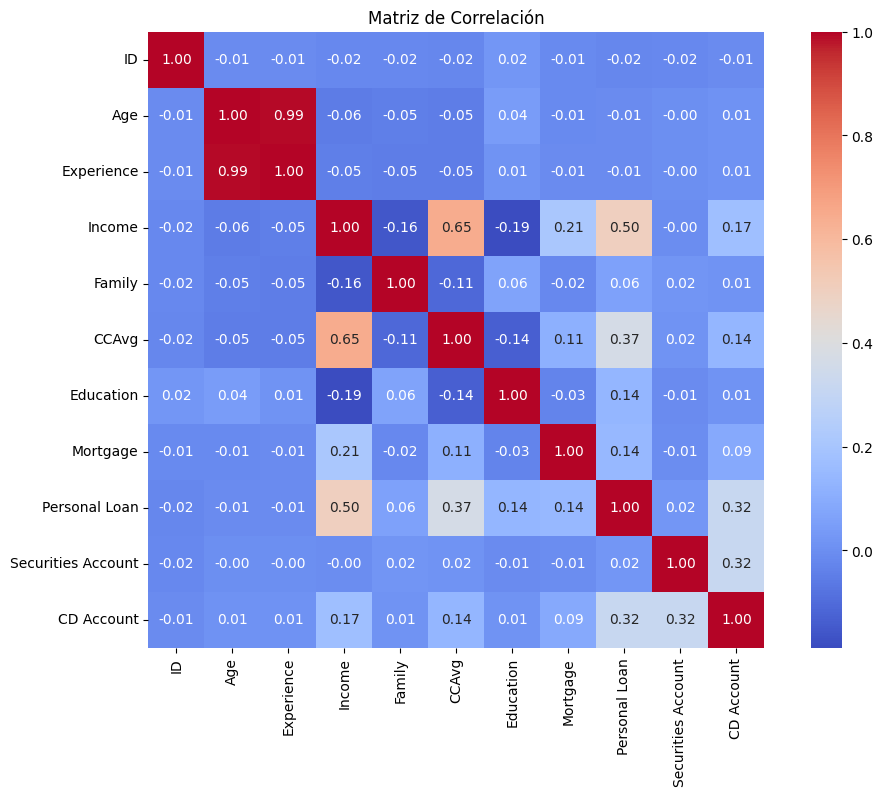

In [165]:
# Una vez normalizados los datos, podemos realizar un análisis de correlación
corr = df_normalizado.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

Podemos ver que existe una alta correlación entre las variables `Income` y `CCAvg`, esto puede deberse a que, al tener un mayor ingreso anual, es probable que el cliente tenga un mayor gasto mensual en tarjetas de crédito. Por otro lado, existe también una alta correlación respecto a la variable `Personal Loan` y la variable de `Income`, lo que podría indicar que los clientes con un mayor ingreso anual son más propensos a aceptar un préstamo personal.

**Respuesta** Dado que los valores numéricos ahora se encuentran normalizados (entre 0 y 1), se puede proceder a hacer uso de algoritmos de ML.

# Parte 2: Isolation Forest (15 puntos)

### 2.1 Reduzca la cantidad de componente reteniendo el 95% de la varianza (1 punto)

In [166]:
pca_8 = PCA(n_components=0.95)
X = pca_8.fit_transform(df_normalizado)

### 2.2 Utilizando 100 iTrees, cree una instancia de Isolation Forest. ¿Cuántos outliers detecta Isolation Forest y a qué clases verdaderas pertenecen? (3 puntos)

In [167]:
# Creamos una instancia de Isolation Forest con 100 iTrees
iso = IsolationForest(n_estimators=100, random_state=42)
iso.fit(X)

# Obtenemos las predicciones (-1: outlier, 1: inlier)
predictions = iso.predict(X)

# Contamos el número de outliers detectados
outlier_mask = predictions == -1
num_outliers = outlier_mask.sum()
print("Número de outliers detectados:", num_outliers)

# Revisamos a qué clases verdaderas pertenecen los outliers usando la columna "Personal Loan"
print("Distribución de la variable 'Personal Loan' entre los outliers:")
print(df_normalizado['Personal Loan'][outlier_mask].value_counts())

Número de outliers detectados: 1075
Distribución de la variable 'Personal Loan' entre los outliers:
Personal Loan
0.0    595
1.0    480
Name: count, dtype: int64


Podemos ver que gran cantidad de los outliers detectados pertenecen a la clase 0, lo que podría indicar que el modelo está detectando a los clientes que no aceptaron el préstamo personal como outliers.

### 2.3 ¿Como cambia el numero de de outliers detectados al variar el parametro ```contamination```? Utilize los valores ```[0.01, 0.05, 0.1, 0.2]``` (3 puntos)


In [168]:
# Iteramos sobre distintos valores de 'contamination' y contamos los outliers detectados
for cont in [0.01, 0.05, 0.1, 0.2]:
    iso_temp = IsolationForest(n_estimators=100, contamination=cont, random_state=42)
    iso_temp.fit(X)
    predictions_temp = iso_temp.predict(X)
    outlier_mask_temp = predictions_temp == -1
    num_outliers_temp = outlier_mask_temp.sum()
    print(f'Contamination: {cont}, Número de outliers detectados: {num_outliers_temp}')

Contamination: 0.01, Número de outliers detectados: 50
Contamination: 0.05, Número de outliers detectados: 250
Contamination: 0.1, Número de outliers detectados: 500
Contamination: 0.2, Número de outliers detectados: 1000


Respuesta: Se puede ver que al aumentar el valor de `contamination`, el número de outliers detectados también aumenta. Esto se debe a que al aumentar el valor de `contamination`, el modelo considera un mayor porcentaje de los datos como outliers, lo que lleva a una mayor cantidad de puntos detectados como tales.

### 2.4 Grafique los "anomaly scores" e indique si se ve un umbral claro (2 puntos)

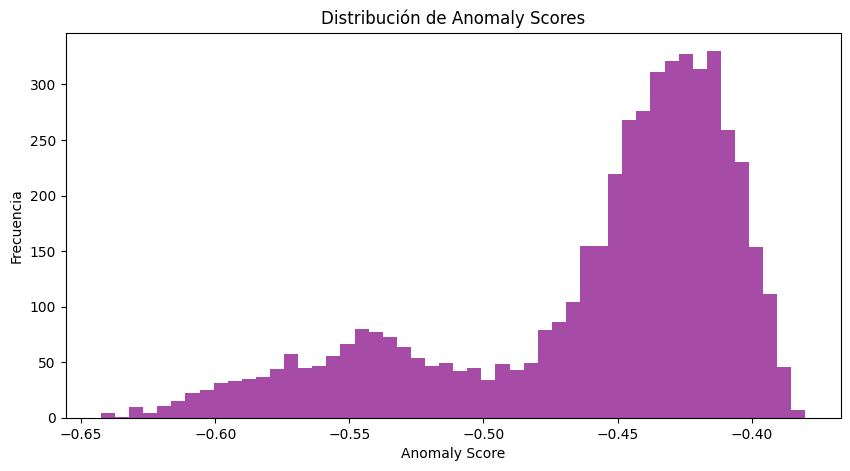

Rango de anomaly scores: -0.6426341476408675 a -0.37993834064270154


In [169]:
# Calcular los anomaly scores usando el método score_samples de IsolationForest
anomaly_scores = iso.score_samples(X)

# Graficar la distribución de los anomaly scores
plt.figure(figsize=(10, 5))
plt.hist(anomaly_scores, bins=50, color='purple', alpha=0.7)
plt.title('Distribución de Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir el rango de scores para tener una idea de la dispersión
print('Rango de anomaly scores:', anomaly_scores.min(), 'a', anomaly_scores.max())

Podemos ver un la existencia de un candidato a umbral para definir los outliers, el cual se encuentra en torno a 0.5. Esto se puede observar ya que la mayoría de los puntos se encuentran por debajo de este umbral, mientras que los puntos que se encuentran por encima de este umbral son considerados outliers.

### 2.5 Que tan estable es la detección de outliers si cambiamos la cantidad de arboles (```n_estimators```) (4 puntos)

In [170]:
# Experimentamos con distintos valores de n_estimators para evaluar la estabilidad en la detección de outliers.
# Usaremos el valor de 'contamination' ya definido (0.2) y la variable X ya disponible.
for n in [50, 100, 150, 200, 300]:
    clf = IsolationForest(n_estimators=n, contamination=cont, random_state=42)
    clf.fit(X)
    predictions = clf.predict(X)
    num_outliers = (predictions == -1).sum()
    print(f'n_estimators: {n} -> Número de outliers detectados: {num_outliers}')

n_estimators: 50 -> Número de outliers detectados: 1000
n_estimators: 100 -> Número de outliers detectados: 1000
n_estimators: 150 -> Número de outliers detectados: 1000
n_estimators: 200 -> Número de outliers detectados: 1000
n_estimators: 300 -> Número de outliers detectados: 1000


Se observa que, al variar `n_estimators`, el número de outliers detectados se mantiene relativamente estable, lo que indica que la detección es robusta a cambios en la cantidad de árboles.

### 2.6 Grafique los utliers detectados en las primeras dos componentes principales. (Utilize parametro ```alpha=0.6```) (2 puntos)

In [171]:
df_pca = pd.DataFrame(X, columns=[f'PC{i+1}' for i in range(8)])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.267624,0.901604,0.290141,0.005482,0.801316,-0.479329,-0.295424,0.152882
1,-0.337655,0.383890,-0.047396,0.291827,0.802960,-0.475825,-0.273699,0.207439
2,-0.540815,-0.176669,-0.013480,-0.310240,0.057103,-0.524099,0.171878,0.271119
3,-0.148862,-0.290417,0.309582,-0.357952,-0.032214,-0.532364,-0.024535,-0.068880
4,0.212625,0.606985,-0.033245,-0.208052,-0.048255,-0.503118,0.047186,0.023244
...,...,...,...,...,...,...,...,...
4995,0.364224,-0.373820,0.352834,-0.713649,0.087788,0.428303,0.038497,0.031806
4996,-0.219978,0.784734,-0.057168,-0.349168,-0.009100,0.499591,0.119401,0.159634
4997,0.538494,-0.499041,-0.499011,0.035189,0.003675,0.471780,0.050288,0.074894
4998,0.167116,-0.090249,-0.613182,0.248646,-0.080914,0.508204,0.020156,0.048858


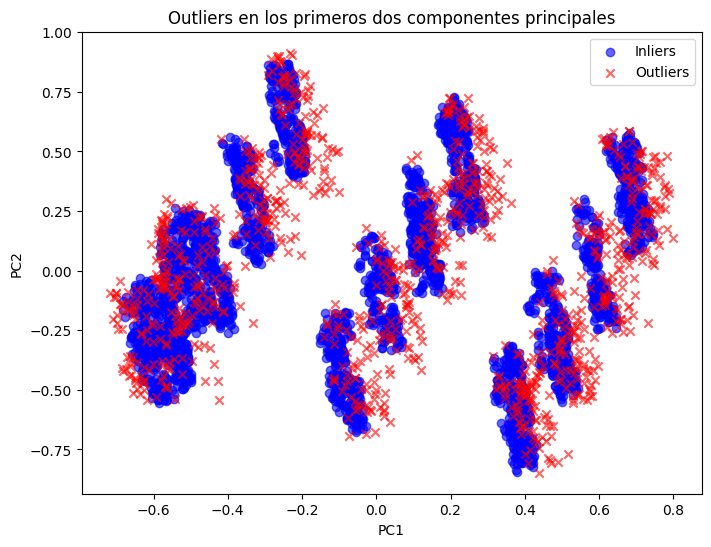

In [172]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca.loc[~outlier_mask, 'PC1'], df_pca.loc[~outlier_mask, 'PC2'], color='blue', alpha=0.6, label='Inliers')
plt.scatter(df_pca.loc[outlier_mask, 'PC1'], df_pca.loc[outlier_mask, 'PC2'], color='red', marker='x', alpha=0.6, label='Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Outliers en los primeros dos componentes principales')
plt.legend()
plt.show()

Analizando la gráfica, se logra apreciar que los outliers detectados por el modelo están levemente alejados de los clusters de datos, lo que podría indicar que estos puntos son efectivamente outliers. Sin embargo, también se puede observar que algunos de los puntos que fueron detectados como outliers se encuentran relativamente cerca de los clusters, lo que podría indicar que el modelo no es completamente efectivo en la detección de outliers.

# Parte 3: HAC (15 puntos)

### 3.1 Reliza un dendograma sin clusters y con distancia threshold igual a 0 para visualizar los datos. Debes usar linkage = "single" (1 punto)

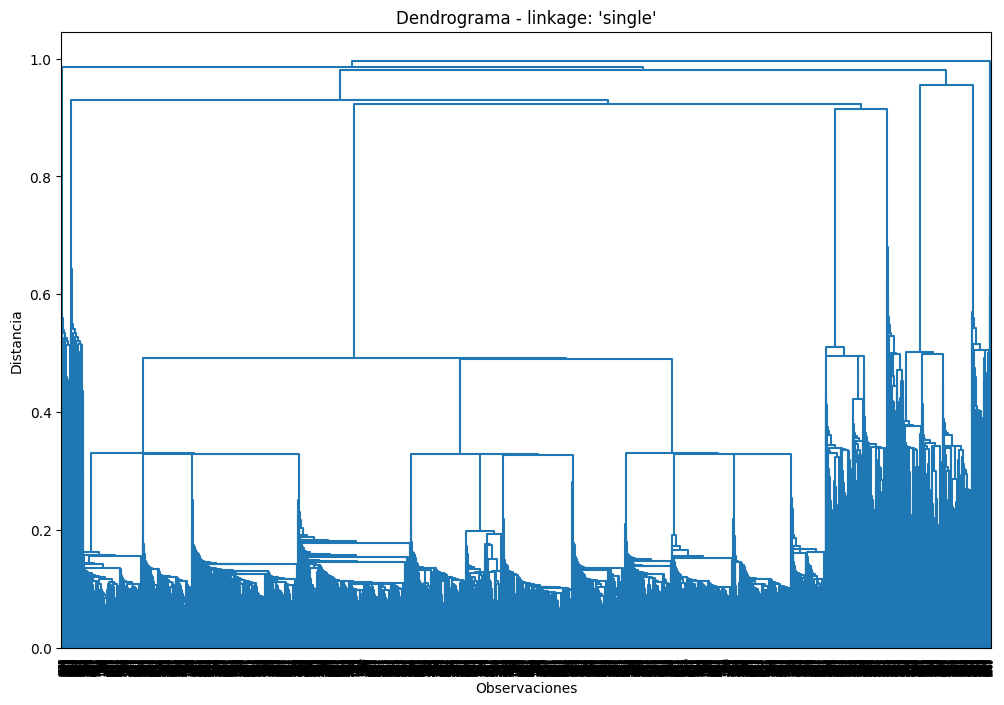

In [173]:
Z = linkage(X, method='single')

# Graficamos el dendrograma sin definir clusters y con un umbral de distancia igual a 0
plt.figure(figsize=(12, 8))
dendrogram(Z, color_threshold=0)
plt.title("Dendrograma - linkage: 'single'")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.show()

### 3.2.1 Realiza los Clustering de Agrupación Jerarquica (HAC) para cada distancia de clustering aglomerativo (linkage), prueba utilizando número de clusters entre 2 y 10. Calcula el Silhouette para ver cual funcionó mejor y explica el por qué de los resultados. (2.5 puntos)
### 3.2.2 Ahora, realiza los Clustering de Agrupación Jerarquica (HAC) para cada tipo de linkage.

In [174]:
# Definimos los métodos de linkage a evaluar
linkage_methods = ['single', 'complete', 'average', 'ward']
results = []

for method in linkage_methods:
    print('Evaluando linkage:', method)
    best_score = -1
    best_k = None
    for k in range(2, 11):
        agg = AgglomerativeClustering(n_clusters=k, linkage=method)
        labels = agg.fit_predict(X)
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_k = k
    results.append((method, best_k, best_score))

print('Resumen de los mejores resultados:')
for method, k, score in results:
    print(f'Linkage: {method}, Mejor número de clusters: {k}, Silhouette Score: {score:.3f}')

Evaluando linkage: single
Evaluando linkage: complete
Evaluando linkage: average
Evaluando linkage: ward
Resumen de los mejores resultados:
Linkage: single, Mejor número de clusters: 2, Silhouette Score: 0.300
Linkage: complete, Mejor número de clusters: 2, Silhouette Score: 0.314
Linkage: average, Mejor número de clusters: 2, Silhouette Score: 0.351
Linkage: ward, Mejor número de clusters: 5, Silhouette Score: 0.235


### 3.3 Calcula el Silhouette para ver cual funcionó mejor y explica el por qué de los resultados, explicando cómo funciona cada linkage.


La elección del método linkage afecta cómo se unen los clusters.
- `single` tiende a producir clusters alargados y es sensible a ruido.
- `complete` y 'average' ofrecen agrupaciones más compactas.
- `ward` minimiza la suma de cuadrados dentro de los clusters (ideal para datos euclidianos).

Según el Silhouette Score, el Linkage con mejor rendimiento fue el de `average` con un valor de 0.351, lo que indica que los clusters formados son relativamente compactos y bien separados. Esto puede deberse a que el método `average` considera la distancia promedio entre todos los puntos de los clusters, lo que permite una mejor separación entre ellos.

### 3.4 Grafica los clusters utilizando un PCA de 2 dimensiones de los datos. Para ello debes utilizar la mejor combinación del enunciado anterior (1 punto)






Con el análisis realizado, ¿Cuál es la importancia del criterio de vinculación al momento de agrupar los datos? Pruebe ahora utilizando solamente dos clusters y compare los graficos.

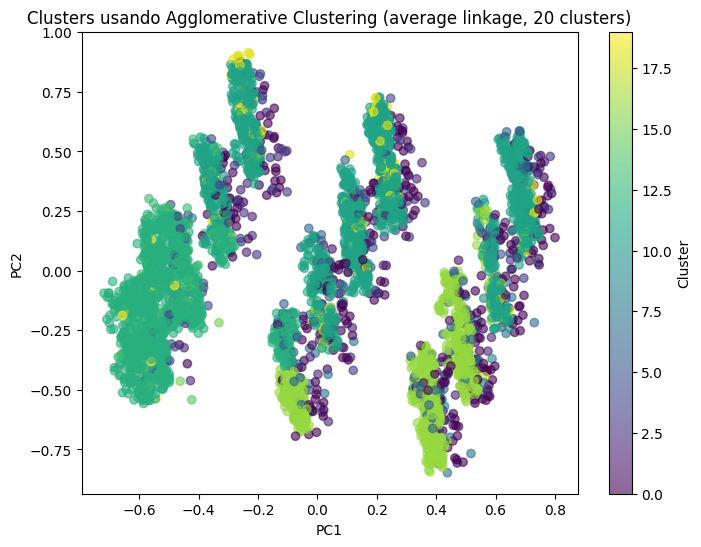

In [175]:
# Utilizamos el método de linkage 'average' con 20 clusters 
agg_best = AgglomerativeClustering(n_clusters=20, linkage='average')
labels_best = agg_best.fit_predict(X)

# Graficamos con los dos principales componentes del PCA (ya almacenados en df_pca)
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels_best, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters usando Agglomerative Clustering (average linkage, 20 clusters)')
plt.colorbar(label='Cluster')
plt.show()

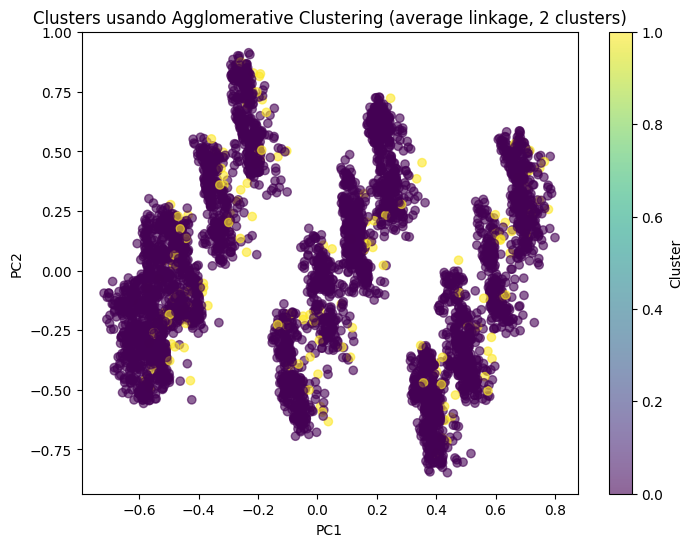

In [176]:
# Utilizamos el método de linkage 'average' con 2 clusters 
agg_best = AgglomerativeClustering(n_clusters=2, linkage='average')
labels_best = agg_best.fit_predict(X)

# Graficamos con los dos principales componentes del PCA (ya almacenados en df_pca)
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels_best, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters usando Agglomerative Clustering (average linkage, 2 clusters)')
plt.colorbar(label='Cluster')
plt.show()

Se puede ver que en el gráfico con 20 clusters, la diferencia de color es mayor, lo que indica que los clusters están mejor separados entre sí. Esto se debe a que al aumentar el número de clusters, el modelo tiene más flexibilidad para agrupar los datos de manera más precisa. Por otro lado, al reducir el número de clusters a 2, la separación entre los clusters disminuye, lo que puede llevar a una menor precisión en la clasificación de los datos. Esto se debe a que al tener menos clusters, el modelo tiene menos flexibilidad para agrupar los datos, lo que puede llevar a una mayor cantidad de puntos mal clasificados.

# Parte 4: DBSCAN y HDBSCAN (15 puntos)

### 4.1.- DBSCAN

Utilizando DBSCAN, itera sobre valores de eps entre 0.25 y 2, con un salto de 0.25 por iteracion. Ademas, itera sobre el numero minimo de muestras, probando con 1, 2, 3 y 4. (3 puntos)

In [ ]:
for eps in np.arange(0.25, 2.25, 0.25):
    for min_samples in [1, 2, 3, 4]:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan_model.fit_predict(X)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)
        print(f'eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {n_clusters}, Noise points: {n_noise}')

eps: 0.25, min_samples: 1, Clusters: 522, Noise points: 0
eps: 0.25, min_samples: 2, Clusters: 153, Noise points: 369
eps: 0.25, min_samples: 3, Clusters: 82, Noise points: 511
eps: 0.25, min_samples: 4, Clusters: 61, Noise points: 634
eps: 0.50, min_samples: 1, Clusters: 50, Noise points: 0
eps: 0.50, min_samples: 2, Clusters: 26, Noise points: 24
eps: 0.50, min_samples: 3, Clusters: 22, Noise points: 32
eps: 0.50, min_samples: 4, Clusters: 18, Noise points: 58
eps: 0.75, min_samples: 1, Clusters: 9, Noise points: 0
eps: 0.75, min_samples: 2, Clusters: 8, Noise points: 1
eps: 0.75, min_samples: 3, Clusters: 8, Noise points: 1
eps: 0.75, min_samples: 4, Clusters: 8, Noise points: 3
eps: 1.00, min_samples: 1, Clusters: 1, Noise points: 0
eps: 1.00, min_samples: 2, Clusters: 1, Noise points: 0
eps: 1.00, min_samples: 3, Clusters: 1, Noise points: 0
eps: 1.00, min_samples: 4, Clusters: 1, Noise points: 0
eps: 1.25, min_samples: 1, Clusters: 1, Noise points: 0
eps: 1.25, min_samples: 2, Cl

**RESPUESTA:** Podemos ver que, para un valor intermedio con eps=0.75, se generan 8 clusters (con min_samples de 2, 3 o 4) y casi no hay puntos de ruido, lo que indica que la estructura del dataset se agrupa de manera consistente en esos 8 grupos.

#### 4.1.2 Con la información de los parametros anterior, calcula cual es el número de clusters óptimo para el modelo DBSCAN. (1.5 puntos)

**RESPUESTA:** Tal como se mencionó en el punto anterior, el número óptimo de clusters para el modelo DBSCAN es 8.

#### 4.1.3 Determine tambien el valor optimo del parametro `eps` y `min_samples` (0.5 puntos)

**RESPUESTA:** El valor óptimo de `eps` es 0.75 y el valor óptimo de `min_samples` es 2, ya que con estos valores se obtienen 8 clusters y casi no hay puntos de ruido.

#### 4.1.4 Obtenga el numero de clusters utilizando los parametros optimos encontrados. Explique por qué podría haber encontrado ese valor, el cual se puede o no ajustar al número de clases en el dataset. (1 puntos)

In [178]:
# Creamos el modelo DBSCAN con eps=0.75 y min_samples=[2, 3, 4] utilizando los parámetros óptimos encontrados
for min_samples in [2, 3, 4]:
    dbscan_opt = DBSCAN(eps=0.75, min_samples=min_samples)
    labels_opt = dbscan_opt.fit_predict(X)

    # El número de clusters se determina ignorando el ruido etiquetado como -1
    n_clusters_opt = len(set(labels_opt)) - (1 if -1 in labels_opt else 0)
    print(f'Número de clusters encontrados: (min_samples: {min_samples})', n_clusters_opt) 

Número de clusters encontrados: (min_samples: 2) 8
Número de clusters encontrados: (min_samples: 3) 8
Número de clusters encontrados: (min_samples: 4) 8


**RESPUESTA:** El modelo DBSCAN ha encontrado 8 clusters. Este valor se basa en la estructura de densidad de los datos, lo que significa que los puntos se agrupan en zonas densas según la configuración de eps y min_samples.

Es importante notar que DBSCAN agrupa datos basándose en la densidad y no en las clases reales predefinidas. Por ello, el número de clusters encontrados (8 en este caso) puede no coincidir con el número de clases en el dataset (por ejemplo, dos clases en el caso de préstamos aprobados o no).

### 4.2.- HDBSCAN

Utilizando HDSCAN, cree un modelo con el `cluster_selection_epsilon` igual al caso de DBSCAN y determine el número de clusters. Itere sobre el min_cluster_size para encontrar el mejor silhoutte score. Compare el resultado con DBSCAN.  (3 puntos)

In [181]:
# Iteramos sobre diferentes valores para min_cluster_size
min_cluster_sizes = range(2, 21)
hdbscan_results = []

for mcs in min_cluster_sizes:
    # Creamos el modelo HDBSCAN con cluster_selection_epsilon igual al eps óptimo de DBSCAN (0.75)
    hdbscan_model = HDBSCAN(cluster_selection_epsilon=0.75, min_cluster_size=mcs)
    labels_hdb = hdbscan_model.fit_predict(X)
    
    # Determinamos el número de clusters (ignorando la etiqueta de ruido -1)
    n_clusters = len(set(labels_hdb)) - (1 if -1 in labels_hdb else 0)
    
    # Calculamos el Silhouette score solo si hay al menos 2 clusters y eliminamos el ruido
    if n_clusters > 1:
        mask = labels_hdb != -1
        score = silhouette_score(X[mask], labels_hdb[mask])
    else:
        score = -1
    hdbscan_results.append((mcs, n_clusters, score))

c:\Users\benja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\d

In [182]:
# Identificar el min_cluster_size con el mejor Silhouette score
best_mcs, best_clusters, best_score = max(hdbscan_results, key=lambda x: x[2])
print("Mejor resultado de HDBSCAN:")
print(f"min_cluster_size = {best_mcs} => clusters: {best_clusters}, silhouette score: {best_score:.3f}")

Mejor resultado de HDBSCAN:
min_cluster_size = 6 => clusters: 7, silhouette score: 0.285


**RESPUESTA:** Con HDBSCAN y un eps=0.75, junto con un min_samples=4 se encontraron 7 clusters, mientras que para DBSCAN se encontraron 8 clusters. Esto indica que HDBSCAN es un poco más conservador al agrupar los datos, lo que puede ser beneficioso en datasets con ruido o con una estructura de densidad más compleja. Además, HDBSCAN tiende a ser más robusto a la variación de los parámetros, lo que puede llevar a una mejor generalización en comparación con DBSCAN.

#### 4.2.2 Grafique los clusters utilizando PCA de 2 dimensiones. (1 punto)

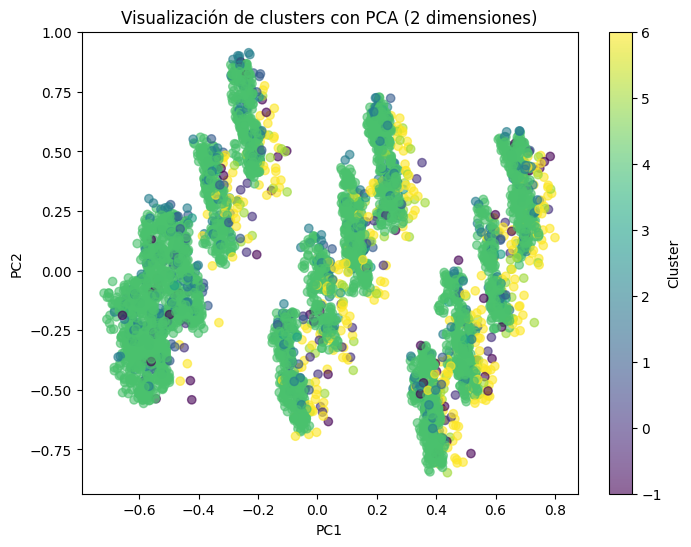

In [183]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels_hdb, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualización de clusters con PCA (2 dimensiones)')
plt.colorbar(label='Cluster')
plt.show()

¿Que representa cada cluster?

**RESPUESTA:** En base al dataframe inicial. se puede decir que cada cluster representa un grupo de clientes con características similares en cuanto a edad, ingresos, gastos en tarjetas de crédito, etc.

### 4.4 Preguntas teoricas sobre HAC, DBSCAN y HDBSCAN (5 puntos)

#### 4.4.1 En tus palabras, ¿Cómo funciona el Agglomerative Clustering? Además, menciona al menos 2 usos para HAC.

**RESPUESTA:** El Agglomerative Clustering es un algoritmo de clustering jerárquico que comienza considerando cada observación como un cluster individual y, de forma iterativa, fusiona los dos clusters más cercanos según alguna métrica de distancia (por ejemplo, la distancia promedio, completa o la mínima). Luego, se genera una estructura en forma de árbol (dendrograma) que permite visualizar la unión progresiva de los clusters y, por tanto, explorar la estructura subyacente de los datos sin necesidad de definir un número fijo de clusters de entrada.

Investigando, encontré que HAC tiene múltiples aplicaciones, entre las cuales se encuentran:
- Segmentación de clientes: Permite identificar grupos de clientes con comportamientos o características similares para direccionar estrategias de marketing o personalizar ofertas.

- Análisis de documentos: Se utiliza para agrupar documentos o textos basándose en la similitud de contenido, facilitando la organización y búsqueda de información relevante.

#### 4.4.2 Explique que representa un dendograma, mencionando cómo las ramas principales podrían significar las clases del datset.

**RESPUESTA:** Un dendrograma es una representación visual de la estructura jerárquica resultante del algoritmo de clustering Agglomerative Clustering. En él, cada hoja representa una observación individual y cada nodo intermedio indica la fusión de dos clusters en función de una medida de distancia o disimilitud.

Las ramas principales del dendrograma, especialmente aquellas que se forman a partir de fusiones que ocurren a mayor altura (es decir, con mayor distancia), pueden interpretarse como indicativas de las clases o grupos más diferenciados en el conjunto de datos. Cortando el dendrograma a una distancia determinada se pueden extraer clusters que reflejen divisiones naturales en los datos, las cuales a menudo corresponden a las clases o categorías principales que pueden estar presentes en el dataset.

#### 4.4.3 En el contexto del modelo DBSCAN, ¿Que es un core sample? ¿Que podría representar un core sample en términos de un dato en el dataset? Apóyese en la clases y sus características.

**RESPUESTA:** Un core sample en DBSCAN es un punto que cuenta con al menos el número mínimo de vecinos (definido por el parámetro min_samples) dentro de un radio (eps), lo que lo convierte en un punto central de una región de alta densidad. Esto significa que dicho punto se puede utilizar como base para formar y expandir un cluster.

En términos de un dato en el dataset, un core sample podría representar a un cliente típico que posee ciertas características (ingresos, edad, o gastos) compartidas por muchos otros clientes dentro de una región densa del espacio de características. Este dato, por tener múltiples vecinos cercanos, indica que pertenece a un grupo homogéneo o segmento de clientes, lo que puede ayudar a identificar patrones o comportamientos comunes dentro del dataset.

#### 4.4.4 En el modelo de DBSCAN se iteran sobre distintos parametros; eps y min_samples. ¿Qué representan estos parametros?

**RESPUESTA:** Tal como se mencionó anteriormente, en DBSCAN el parámetro eps define el radio o la distancia máxima entre dos puntos para que estos sean considerados vecinos, mientras que min_samples especifica el número mínimo de puntos requeridos dentro de ese radio para que un punto se considere como un "core" y, por lo tanto, pueda ser el centro de un cluster.

#### 4.4.5 ¿Cuál es la diferencia entre DBSCAN y HDBSCAN? ¿Qué beneficios existen de usar un modelo sobre el otro?

**RESPUESTA:** DBSCAN es un algoritmo que agrupa puntos basándose en la densidad local del espacio utilizando dos parámetros fijos, utilizando como parámetros el eps (el radio dentro del cual se buscan vecinos) y min_samples (el número mínimo de puntos requeridos en ese radio para considerar al punto como core), mientras que HDBSCAN es una extensión de DBSCAN que no requiere la definición de un valor fijo para eps, sino que construye una jerarquía de clusters basada en la densidad. Esto permite a HDBSCAN detectar clusters de diferentes densidades y ser más robusto frente al ruido y a la variación de parámetros. 

Respecto a los beneficios de usar uno sobre el otro, se puede decir que DBSCAN es más sencillo de implementar y funciona bien con clusters de densidad uniforme, pero puede ser sensible a la elección de eps y puede fallar si existen clusters de densidades muy variables. Por otro lado, HDBSCAN al no requerir la definición previa de eps y al ser más adaptativo a diferentes densidades, suele producir resultados más consistentes en datasets complejos y ruidosos, proporcionando además información sobre la "confianza" de la asignación a cada cluster.

**Para esta sección, utilize el modelo con mejor silhouette score obtenido.**

# Parte 5: Comparación y eficiencia (5 puntos)

#### 5.1 ¿Cuál de los métodos de clustering resultó ser el más eficiente entre HAC, DBSCAN, HDBSCAN o Isolation Forest? Da una explicación de por qué se puede deber el resultado.

**RESPUESTA:** Entre los métodos estudiados, DBSCAN fue el que mostró mayor eficiencia en la tarea de clustering. Esto se debe a que utiliza criterios basados en la densidad local y aprovecha estructuras espaciales que evitan la necesidad de calcular una matriz completa de distancias, lo cual reduce considerablemente la carga computacional en comparación con métodos como HAC. Además, al requerir únicamente dos parámetros (eps y min_samples), permite formar clusters de manera directa sin recurrir a cálculos jerárquicos complejos. Aunque HDBSCAN ofrece ventajas en la adaptabilidad a distintos niveles de densidad, introduce una complejidad adicional al generar una jerarquía de clusters, lo que puede aumentar el tiempo de procesamiento. Por otro lado, HAC es notablemente costoso en términos computacionales y Isolation Forest, si bien es muy eficiente en la detección de outliers, no está diseñado para realizar clustering.